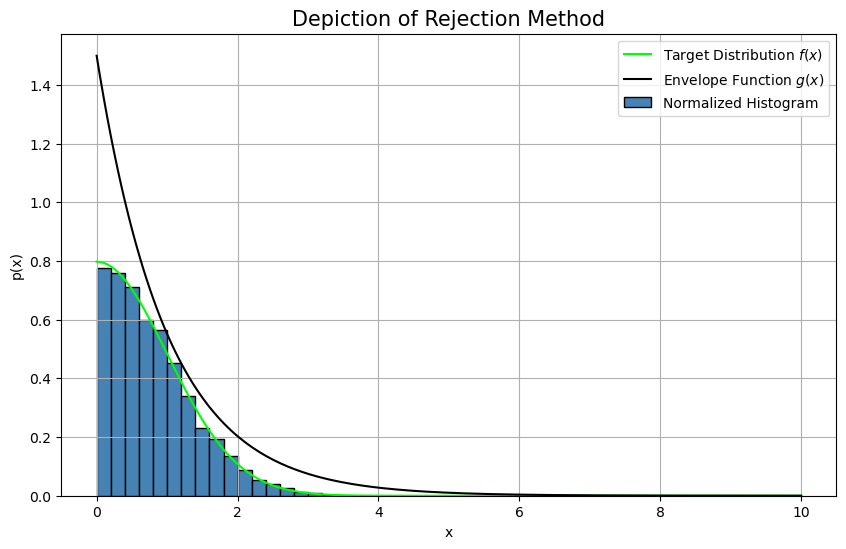

In [2]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt

# Constants
c = 1.5  # The maximum value of the target distribution  f(x) ≈0.7979. Hence, c must be at least this value.
num_samples = 10000 # Provides a large enough sample size to create a smooth and accurate histogram for comparison with the target distribution.

# Target distribution function
def f(x):
    return np.sqrt(2.0 / np.pi) * np.exp(-0.5 * x**2)

# Enclosing function (envelope)
def env(x):
    return c * np.exp(-x)

# Sampler function for the envelope distribution(A function that bounds f(x) from above and is easy to sample from. It ensures that the sampling process is feasible and efficient.)
def sampler(x):
    return -np.log(x)

# Generate random numbers using the sampler
rand_x = sampler(r.rand(num_samples))

# Generate uniform random numbers for the rejection step
y = r.rand(len(rand_x)) * env(rand_x)

# Apply the rejection method
dist_pts = [rand_x[i] for i in range(len(rand_x)) if y[i] < f(rand_x[i])]

# Plot the results
x = np.linspace(0.0, 10.0, 200)
plt.figure(figsize=(10, 6))
plt.title("Depiction of Rejection Method", size=15)

# Plot the target distribution function
plt.plot(x, f(x), color="#00FF00", label="Target Distribution $f(x)$")

# Plot the envelope function
plt.plot(x, env(x), color='black', label="Envelope Function $g(x)$")

# Plot the histogram of the generated random numbers
plt.hist(dist_pts, bins=20, density=True, facecolor='steelblue', edgecolor='black', label='Normalized Histogram')

# Plot formatting
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend()
plt.grid()
plt.show()


 Different c values to experiment.

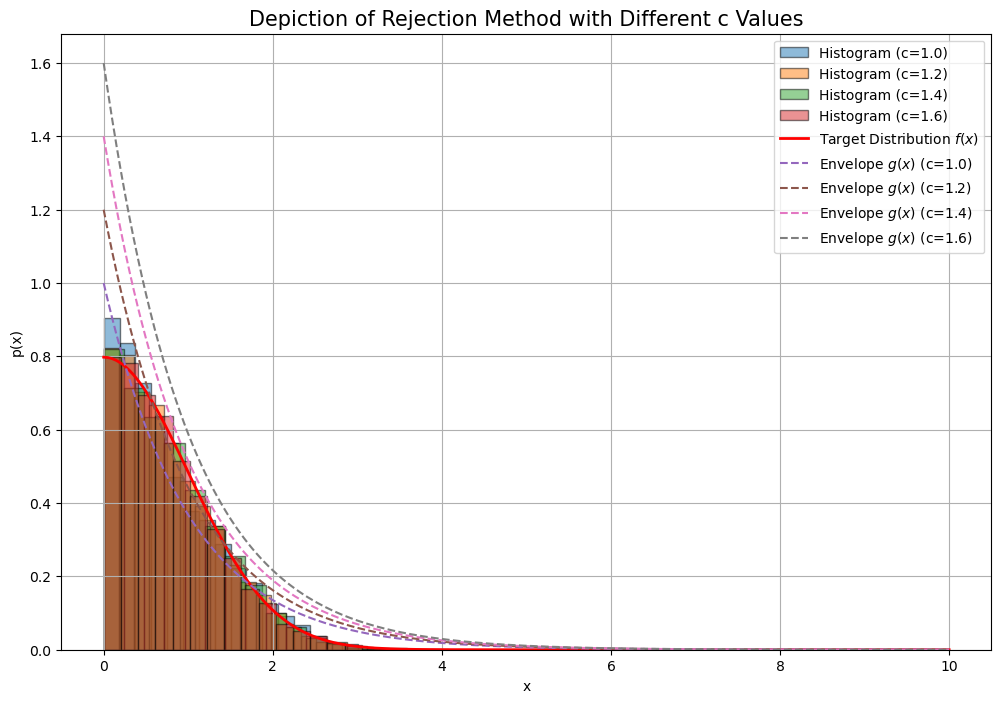

In [3]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt

# Constants
c_values = [1.0, 1.2, 1.4, 1.6]  # Different c values to experiment with
num_samples = 10000  # Number of random samples to generate

# Target distribution function f(x)
def f(x):
    return np.sqrt(2.0 / np.pi) * np.exp(-0.5 * x**2)

# Envelope function g(x)
def env(x, c):
    return c * np.exp(-x)

# Sampler function for the exponential distribution
def sampler(x):
    return -np.log(x)

# Generate samples and plot for different c values
x = np.linspace(0.0, 10.0, 200)

plt.figure(figsize=(12, 8))
plt.title("Depiction of Rejection Method with Different c Values", size=15)

for c in c_values:
    # Generate samples from the exponential distribution
    rand_x = sampler(r.rand(num_samples))

    # Generate uniform random numbers for the rejection step
    y = r.rand(len(rand_x)) * env(rand_x, c)

    # Apply the rejection method
    dist_pts = [rand_x[i] for i in range(len(rand_x)) if y[i] < f(rand_x[i])]

    # Plot the histogram of the generated random numbers
    plt.hist(dist_pts, bins=20, density=True, alpha=0.5, edgecolor='black', label=f'Histogram (c={c})')

# Plot the target distribution function
plt.plot(x, f(x), color="red", linewidth=2, label="Target Distribution $f(x)$")

# Plot the envelope functions for each c value
for c in c_values:
    plt.plot(x, env(x, c), linestyle='--', label=f'Envelope $g(x)$ (c={c})')

# Plot formatting
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend()
plt.grid()
plt.show()
